In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# features/ csv -> dataframe
feat_edu_raw = pd.read_csv("csv/사교육비 총액_full.csv")
df_edu = pd.DataFrame(feat_edu_raw)
feat_hou_raw = pd.read_csv("csv/집값(평균)_full.csv")
df_hou = pd.DataFrame(feat_hou_raw)
feat_mar_raw = pd.read_csv("csv/혼인건수_full.csv")
df_mar = pd.DataFrame(feat_mar_raw)
feat_preg_raw = pd.read_csv("csv/가임 여성수_full.csv")
df_preg = pd.DataFrame(feat_preg_raw)
feat_sal_raw = pd.read_csv("csv/임금_full.csv")
df_sal = pd.DataFrame(feat_sal_raw)

# target/ csv -> dataframe
target_birth_raw = pd.read_csv("csv/시군구_출생아수_full.csv")
df_birth = pd.DataFrame(target_birth_raw)

# 'ADD_UP'이 포함된 데이터 제거
df_birth = df_birth[~df_birth['AREA'].str.contains('ADD_UP', na=False)]

# 고유한 지역 리스트 추출
areas = df_birth['AREA'].unique()

# feature dict / target dict
features_dict = {}
target_dict = {}

# 각 지역별 feature와 target 데이터 생성
for area in areas:
    area_target = df_birth[df_birth['AREA'] == area].drop(columns='AREA').transpose()
    area_target.columns = ['TARGET']

    # 각 feature 데이터 생성
    area_feat_edu = df_edu[df_edu['AREA'] == area].drop(columns='AREA').transpose()
    area_feat_edu.columns = ['EDU']
    
    area_feat_hou = df_hou[df_hou['AREA'] == area].drop(columns='AREA').transpose()
    area_feat_hou.columns = ['HOU']
    
    area_feat_mar = df_mar[df_mar['AREA'] == area].drop(columns='AREA').transpose()
    area_feat_mar.columns = ['MAR']
    
    area_feat_preg = df_preg[df_preg['AREA'] == area].drop(columns='AREA').transpose()
    area_feat_preg.columns = ['PREG']
    
    area_feat_sal = df_sal[df_sal['AREA'] == area].drop(columns='AREA').transpose()
    area_feat_sal.columns = ['SAL']

    # 지역별 feature 데이터 결합
    area_features = pd.concat([area_feat_edu, area_feat_hou, area_feat_mar, area_feat_preg, area_feat_sal], axis=1)

    # 'ADD_UP'이 포함된 features 데이터 제거
    area_features = area_features[~area_features.index.str.contains('ADD_UP', na=False)]

    # dictionary에 feature와 target 저장
    features_dict[area] = area_features
    target_dict[area] = area_target


KeyError: 'AREA'


SEOUL 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


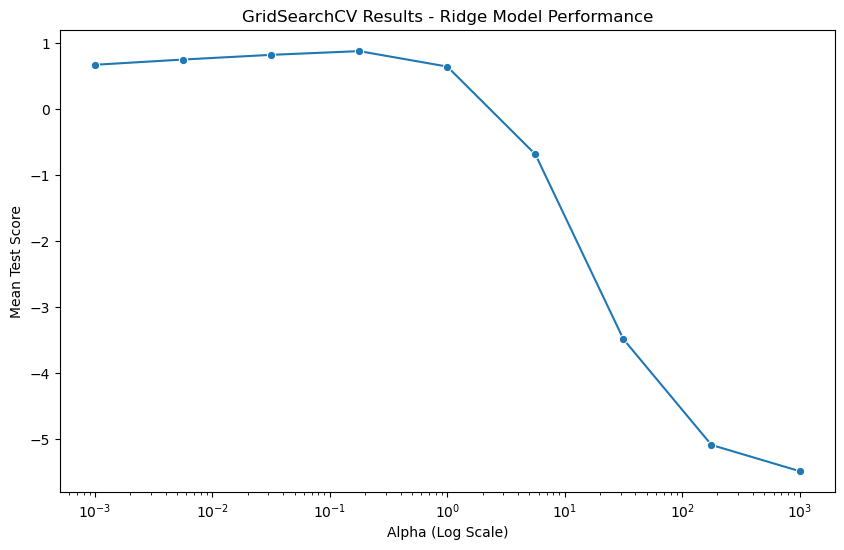


BUSAN 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


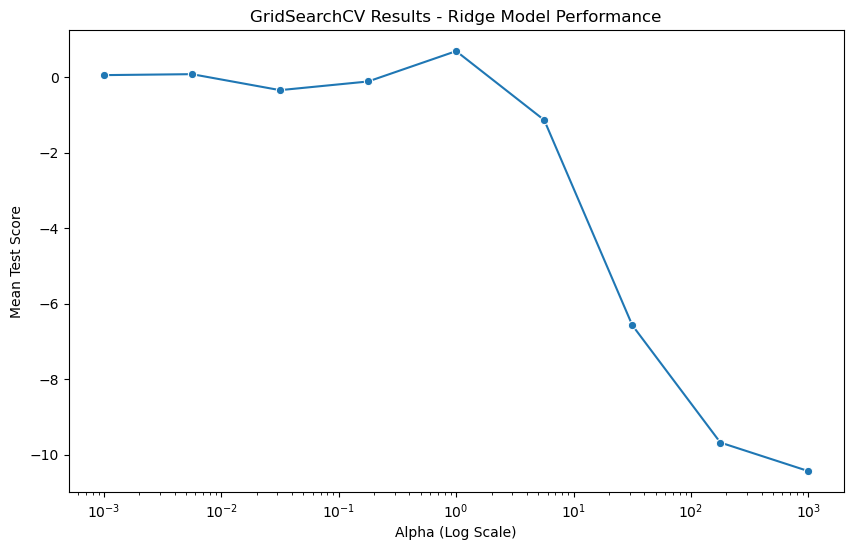


DAEGU 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


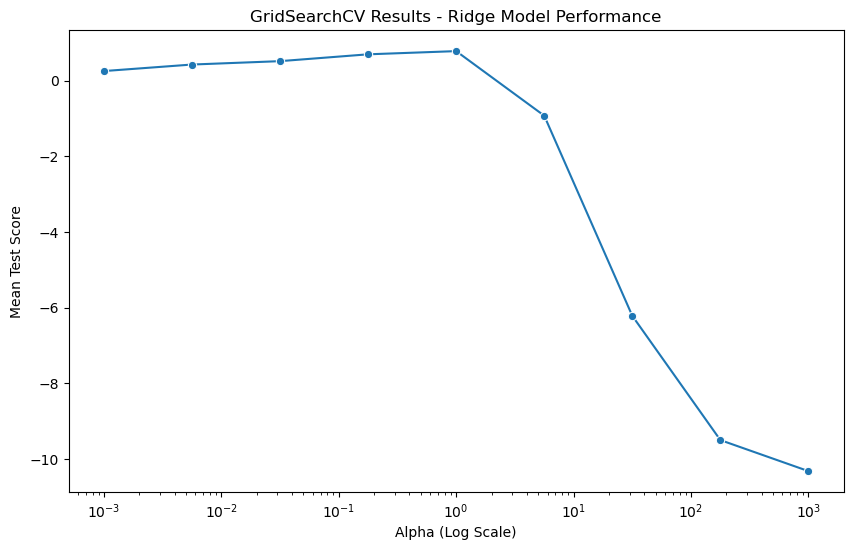


INCHEON 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


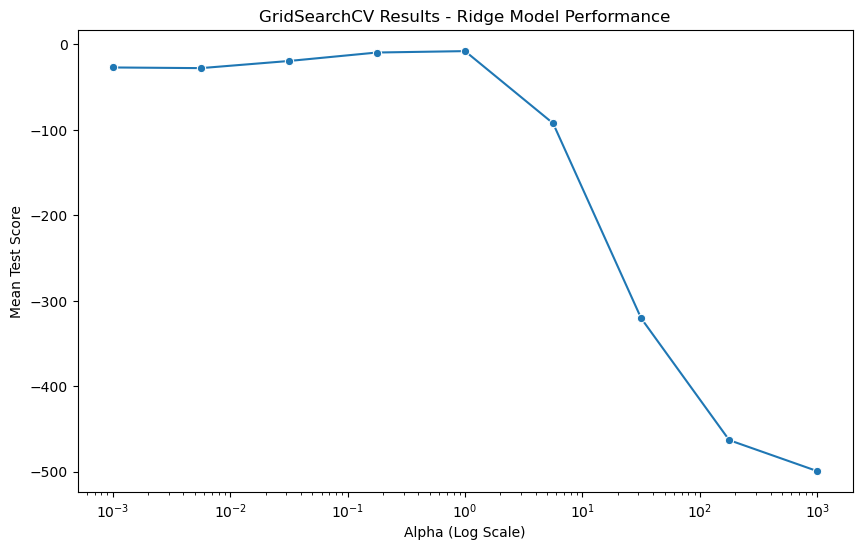


GWANGJU 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


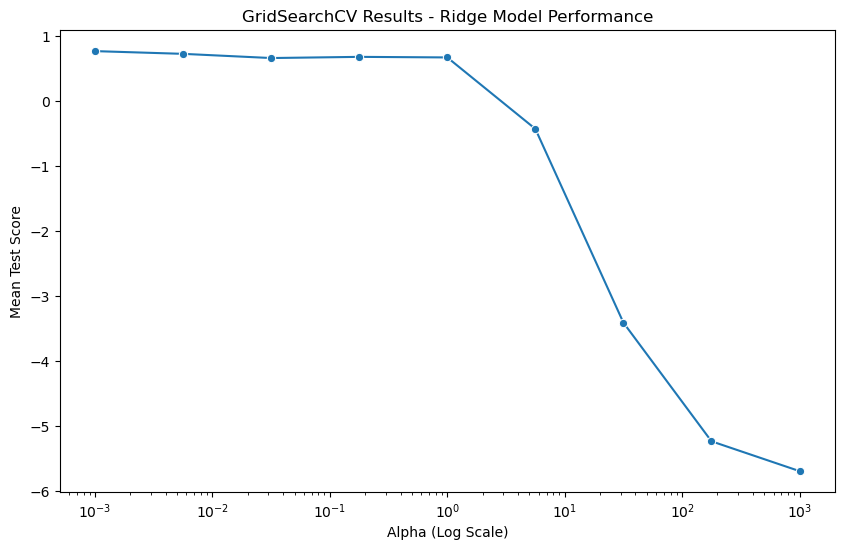


DAEJEON 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


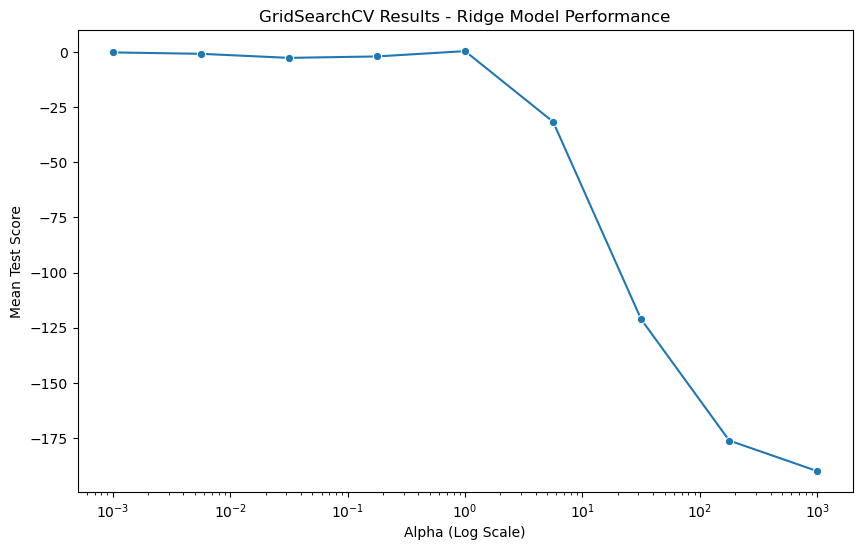


ULSAN 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


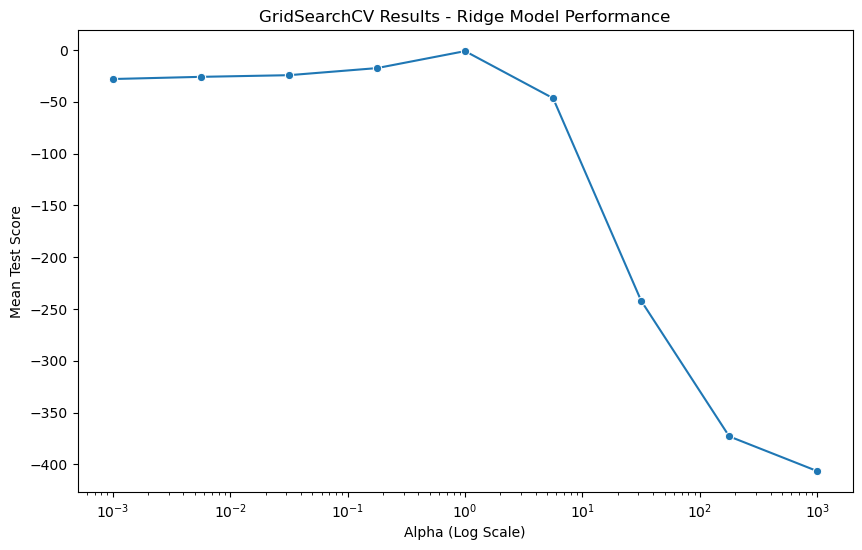


SEJONG 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


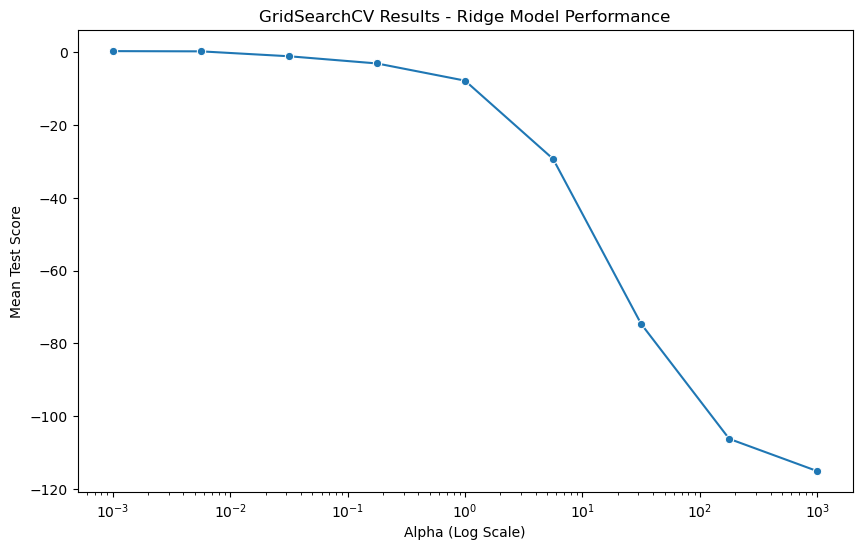


GYEONGGI 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


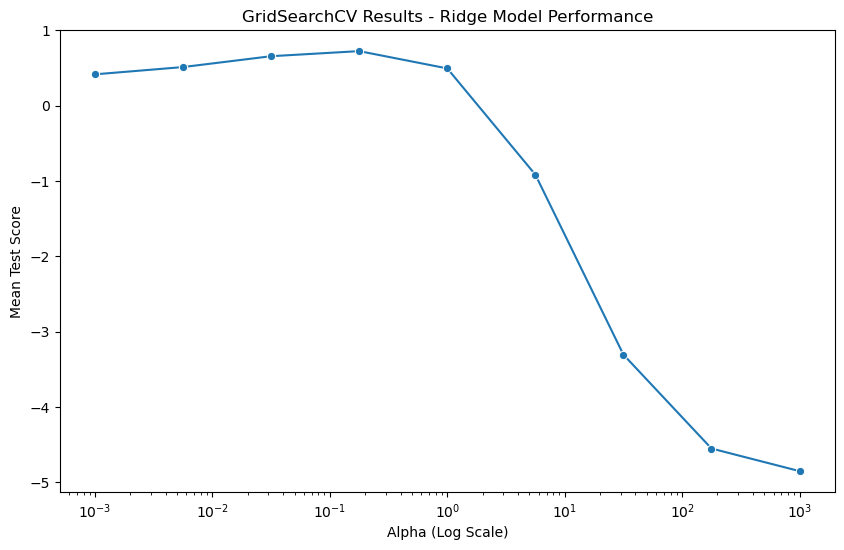


GANGWON 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


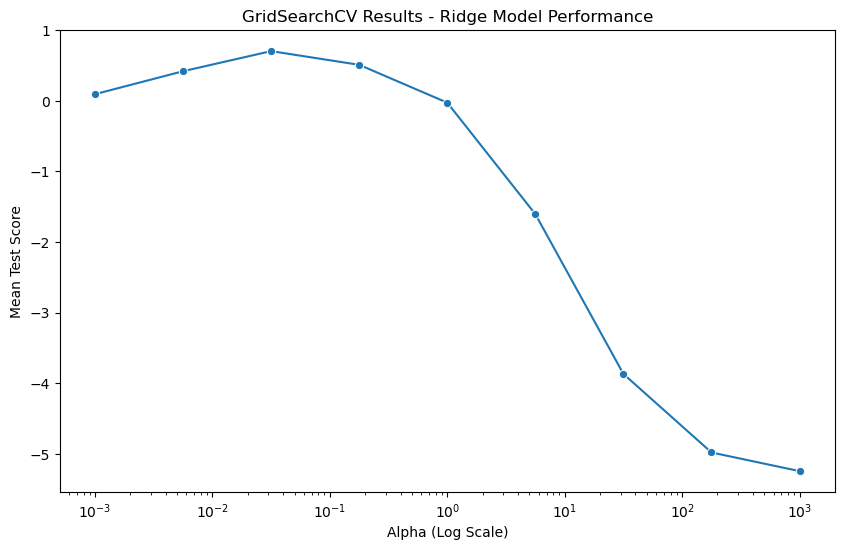


CHUNGBUK 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


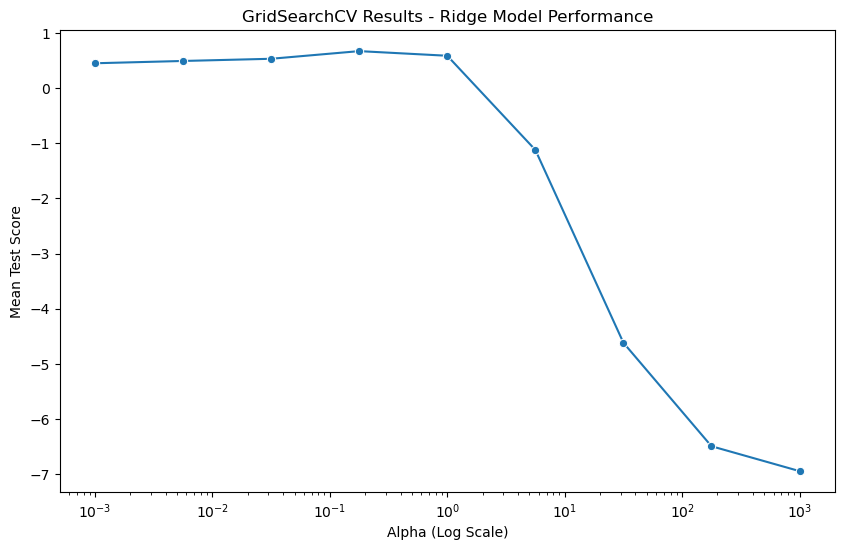


CHUNGNAM 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


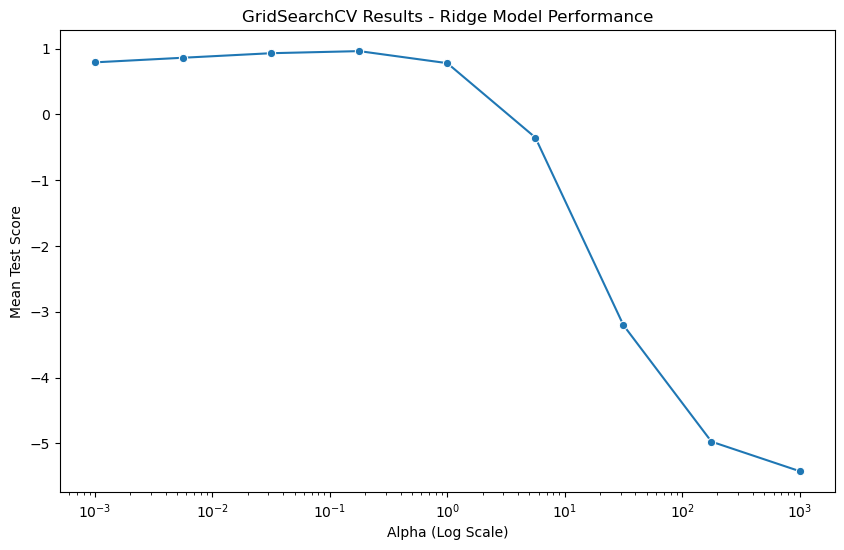


JEONBUK 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


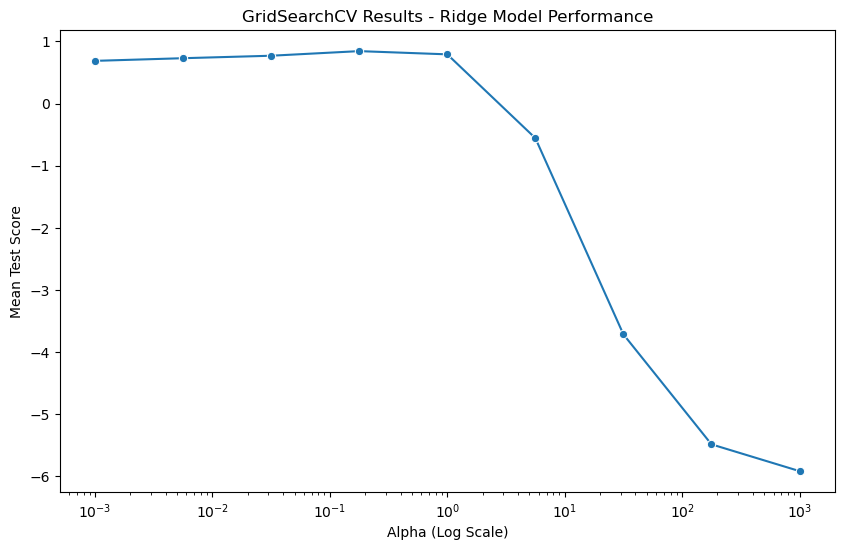


JEONNAM 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


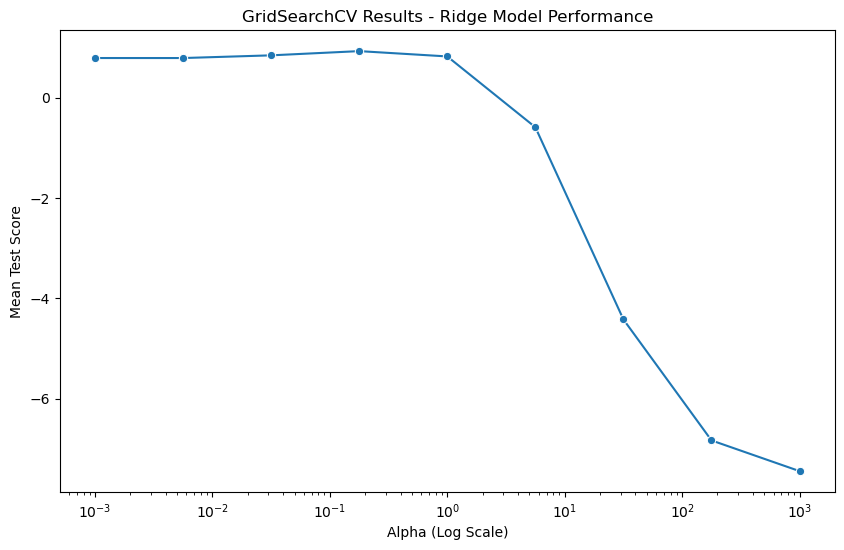


GYEONGBUK 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


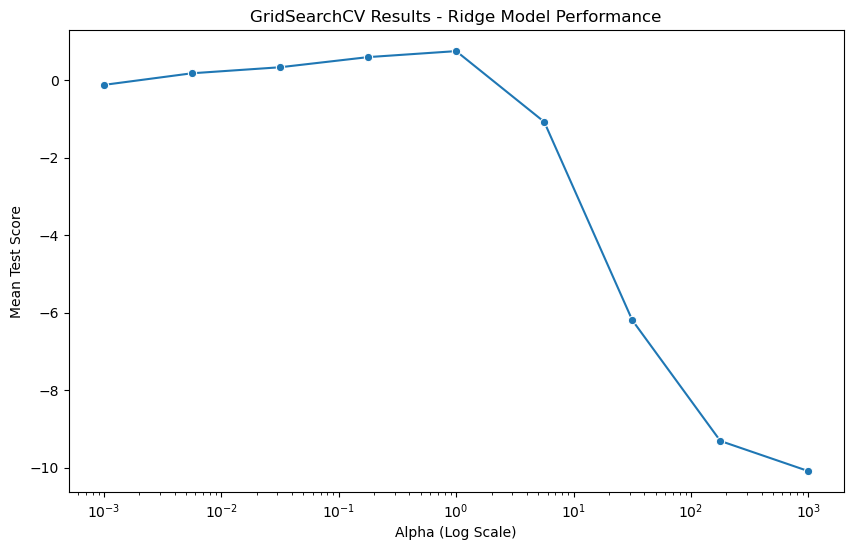


GYEONGNAM 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


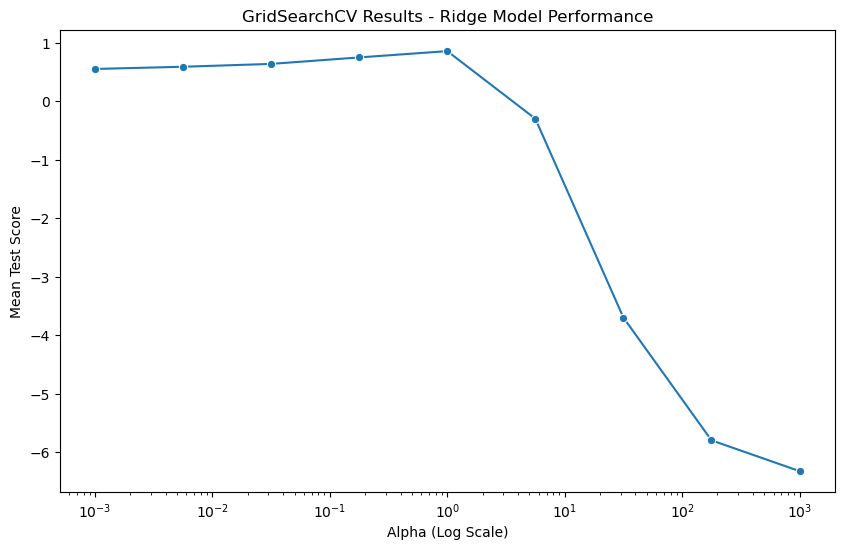


JEJU 데이터에 대한 학습 시작
alpha values: [0.001 0.005623413251903491 0.03162277660168379 0.1778279410038923 1.0
 5.623413251903491 31.622776601683793 177.82794100389228 1000.0]


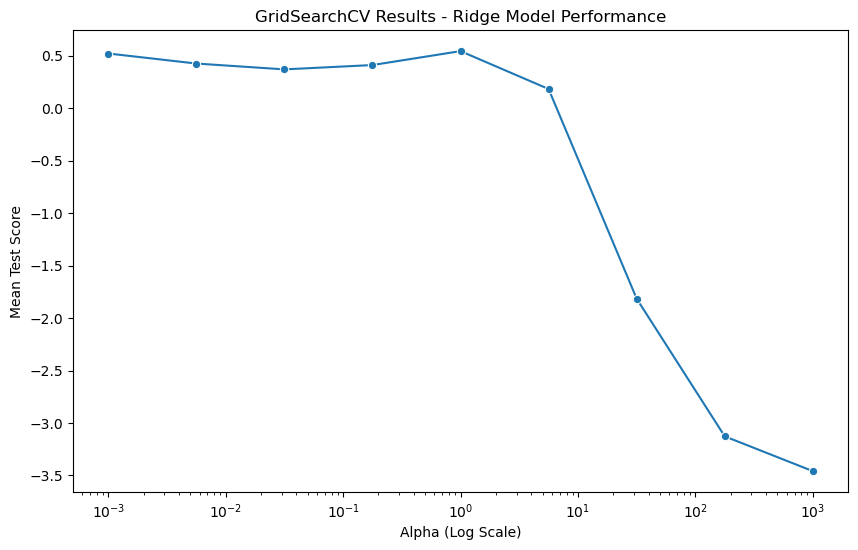

In [ ]:
# 각 지역에 대해 학습 및 평가 진행
for area in features_dict.keys():
    print(f"\n{area} 데이터에 대한 학습 시작")

    # 해당 지역의 feature와 target을 가져오기
    X_area = features_dict[area]
    y_area = target_dict[area]

    # 데이터 스케일링
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X_area)

    # 다항 특성 추가 (degree=2, 예시로 2차 다항식 추가)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_scaled)

    # train_test_split 80% : 20%
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_area, test_size=0.2, random_state=42)
    
     # Ridge 회귀 모델 + GridSearchCV
    ridge_model = Ridge()
    param_grid = {'alpha': np.logspace(-3, 3, 9)}  # alpha 하이퍼파라미터 튜닝
    grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # 최적 모델
    best_ridge_model = grid_search.best_estimator_

    # 예측
    y_train_pred = best_ridge_model.predict(X_train)
    y_test_pred = best_ridge_model.predict(X_test)

    # GridSearchCV 결과 확인
    results = grid_search.cv_results_

    # 결과에서 alpha 값과 해당 성능 추출
    alpha_values = results['param_alpha']
    mean_test_scores = results['mean_test_score']

    # alpha 값과 성능 점수를 데이터프레임으로 변환
    df = pd.DataFrame({
        'alpha': alpha_values,
        'mean_test_score': mean_test_scores
    })

    # 데이터프레임 확인 (디버깅용)
    print(df.head())

    # alpha와 mean_test_score 간의 관계 시각화 (라인 플롯)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='alpha', y='mean_test_score', marker='o')

    # 각 점의 좌표 출력
    for i in range(len(df)):
        plt.text(df['alpha'][i], df['mean_test_score'][i], f'({df["alpha"][i]:.2e}, {df["mean_test_score"][i]:.2f})',
                fontsize=9, color='black', ha='right', va='bottom')

    # 로그 스케일로 x축 설정
    plt.xscale('log')

    # 그래프 제목 및 레이블 설정
    plt.title("GridSearchCV Results - Ridge Model Performance")
    plt.xlabel("Alpha (Log Scale)")
    plt.ylabel("Mean Test Score")

    # 그래프 표시
    plt.show()